# <h1><center>Demo 4</center></h1>

## CRS & Projections

In [1]:
# Import Geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
# Read Countries data
shp = 'data/countries.shp'
countries = gpd.read_file(shp)
countries.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [3]:
# The above GeoData frame must be based upon a Coordinate Refernce System (CRS). 
#How can we find the current CRS of the above GeoDataFRAME?
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Can we project our data into World Mercator CRS (EPSG:3395)?

In [ ]:
# Let's inspect the geometry column to get a sense of units used 
# in the current CRS - decimal degrees


In [5]:
# Let's do some filtering of the GeoDataframe
# We are not interested to continue with countries - Antarctica and Fr. S. Antarctic Lands.
# How can we do this filtering?
countries = countries[(countries.NAME != "Antarctica") & (countries.NAME != "Fr. S. Antarctic Lands")]
# How can we project the data into Mercator Projection epsg=3395
countries_projected = countries.to_crs(epsg=3395)
# How can we again check the changed unit in the geometry column?
countries_projected.geometry[:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

In [6]:
# Let us compare the countries data under two different CRS
countries_projected.crs

<Derived Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

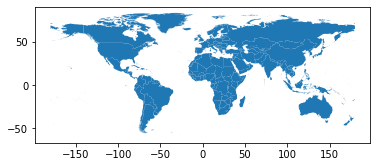

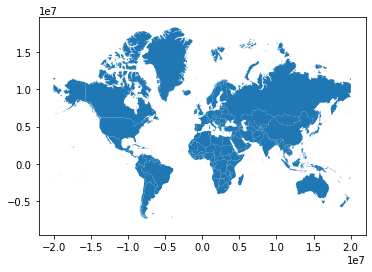

In [7]:
countries.plot()
countries_projected.plot()